<a href="https://colab.research.google.com/github/janhavidhamak/carbon_emission_prediction/blob/main/Notebooks/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Carbon Emission.csv')
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   10000 non-null  object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [ ]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [ ]:
# Fill missing values in 'Vehicle Type' with 'Unknown'
df['Vehicle Type'] = df['Vehicle Type'].fillna('Unknown')

print(df.isna().sum())

Body Type                        0
Sex                              0
Diet                             0
How Often Shower                 0
Heating Energy Source            0
Transport                        0
Vehicle Type                     0
Social Activity                  0
Monthly Grocery Bill             0
Frequency of Traveling by Air    0
Vehicle Monthly Distance Km      0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Long TV PC Daily Hour        0
How Many New Clothes Monthly     0
How Long Internet Daily Hour     0
Energy efficiency                0
Recycling                        0
Cooking_With                     0
CarbonEmission                   0
dtype: int64


Numerical columns: ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'CarbonEmission']
Categorical columns: ['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency', 'Recycling', 'Cooking_With']


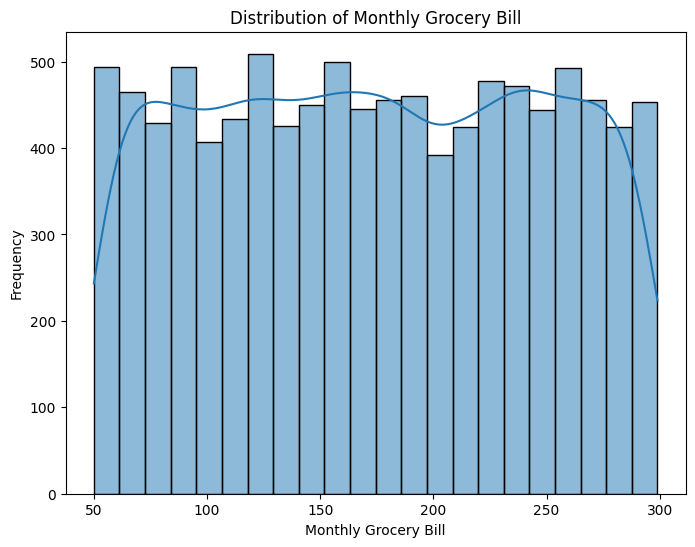

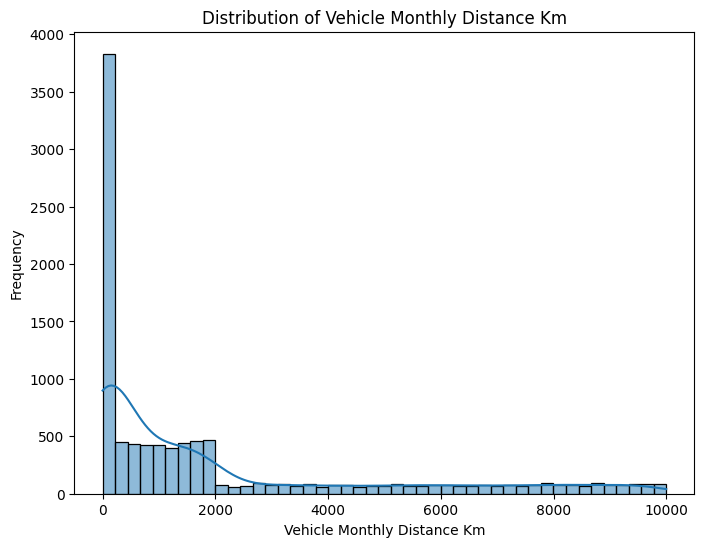

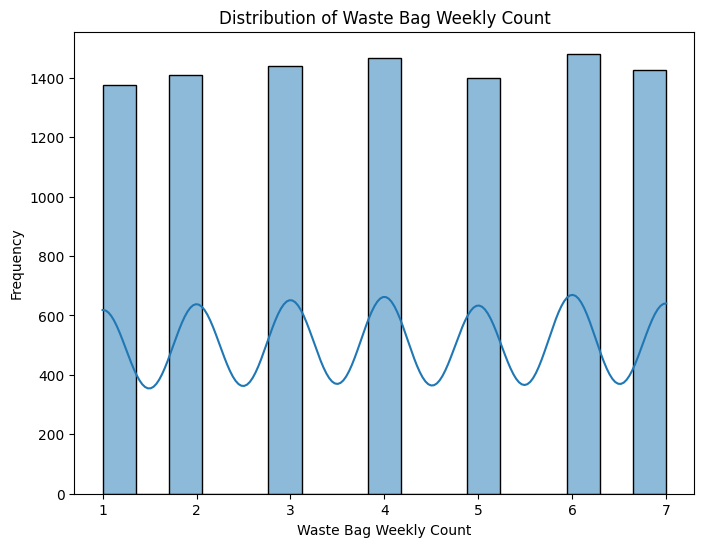

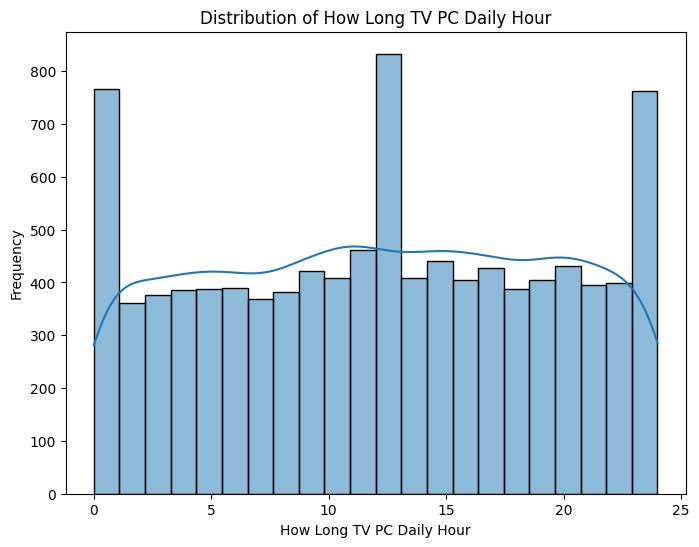

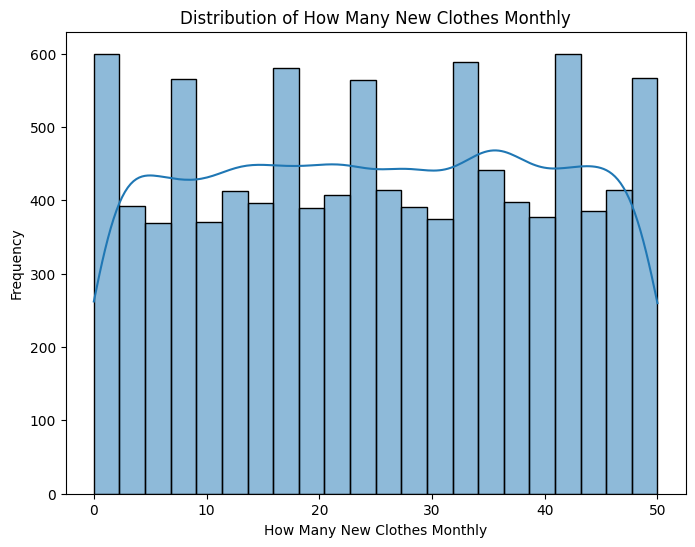

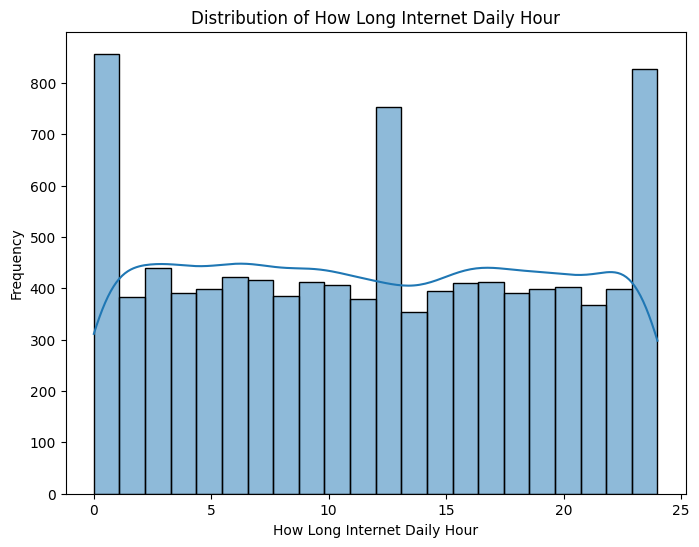

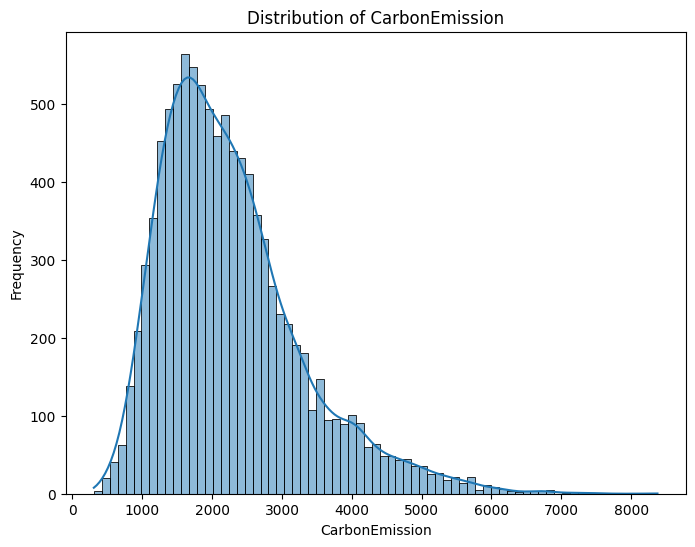

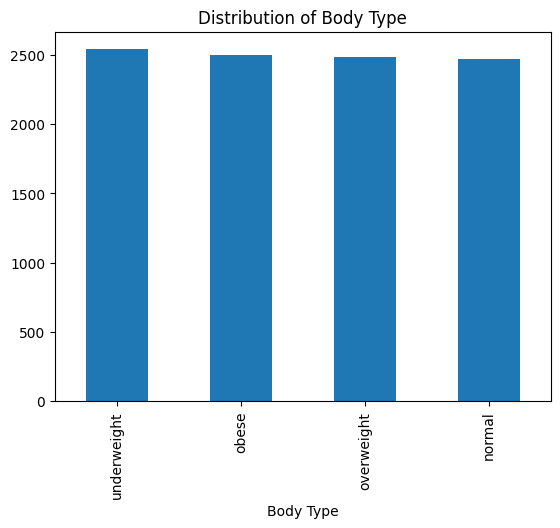

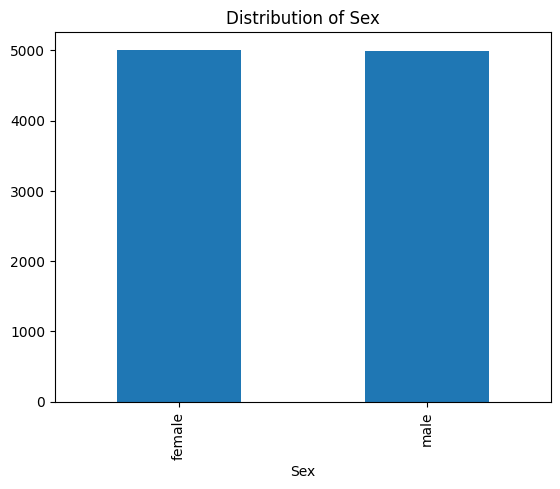

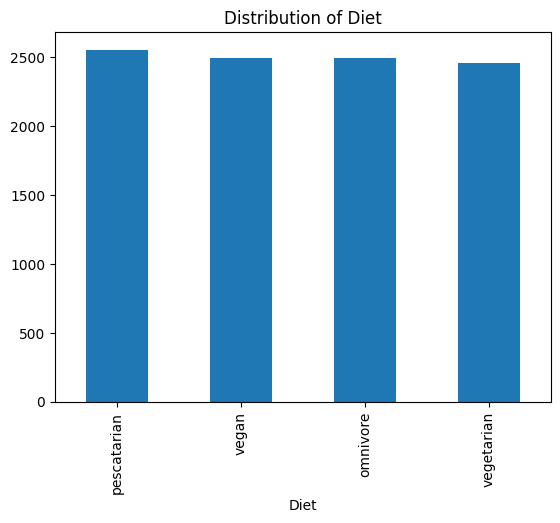

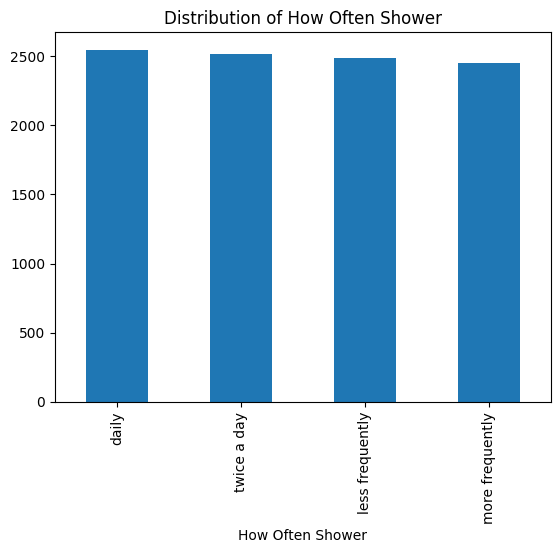

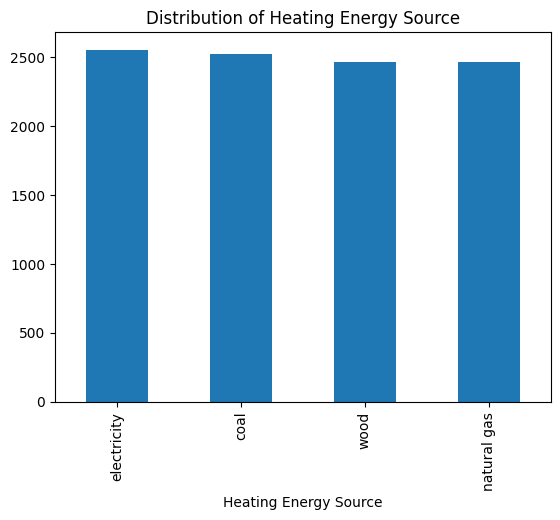

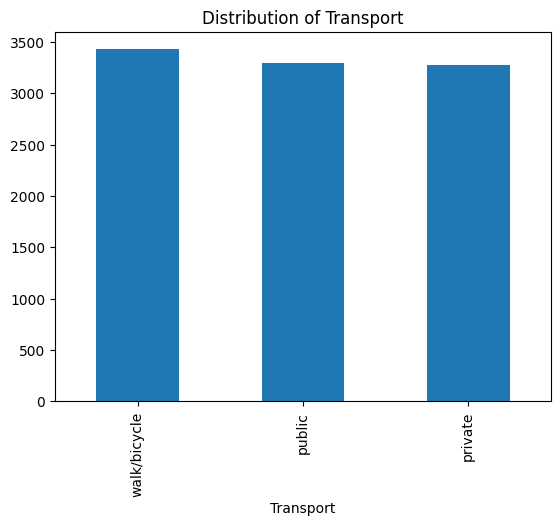

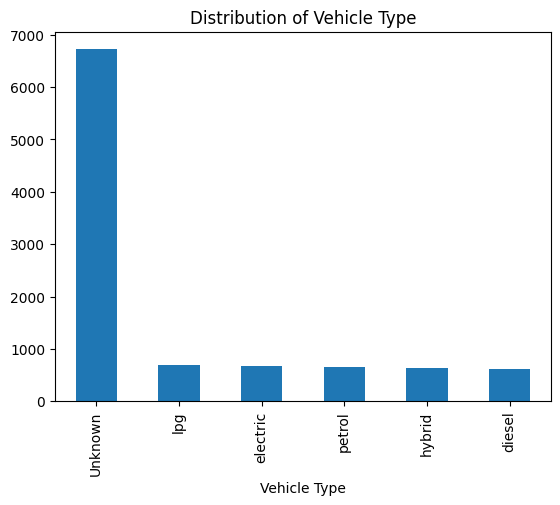

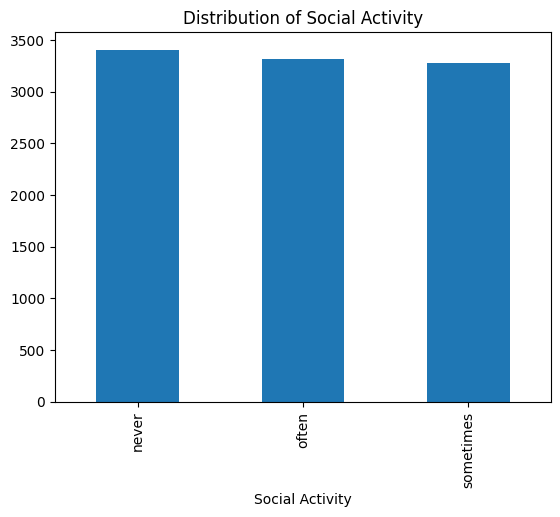

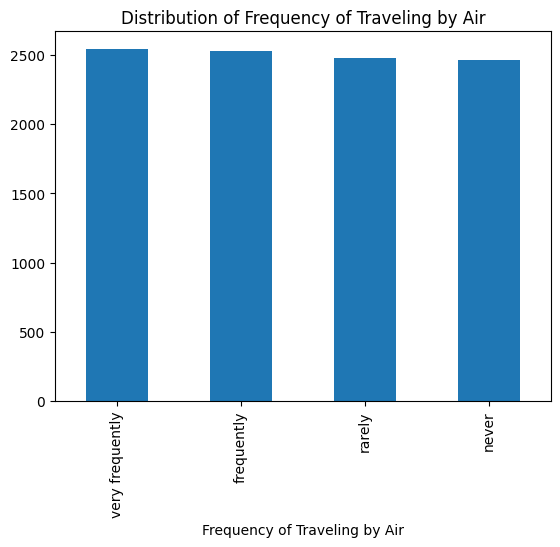

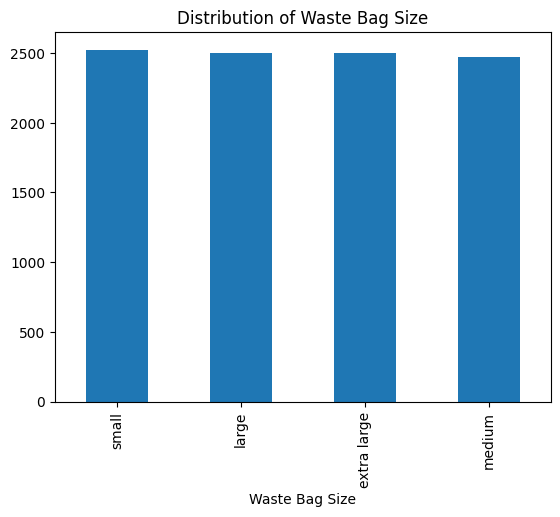

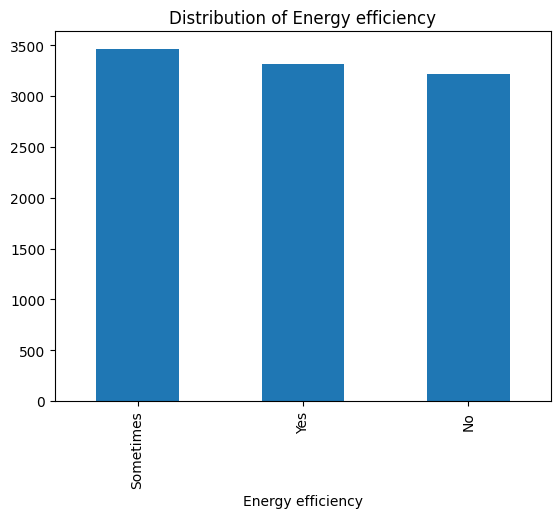

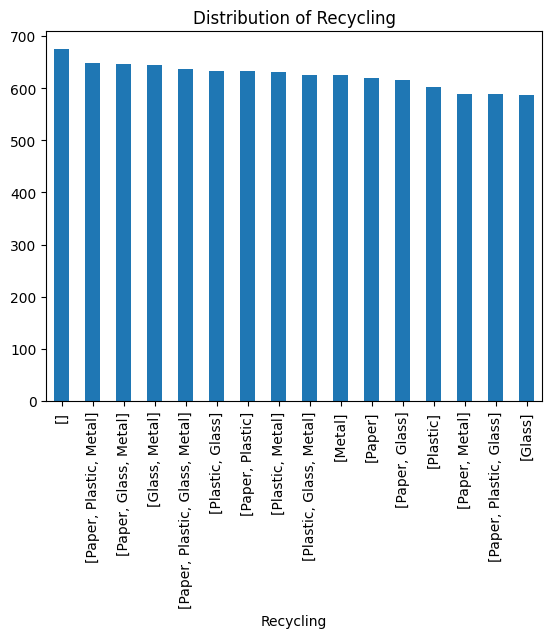

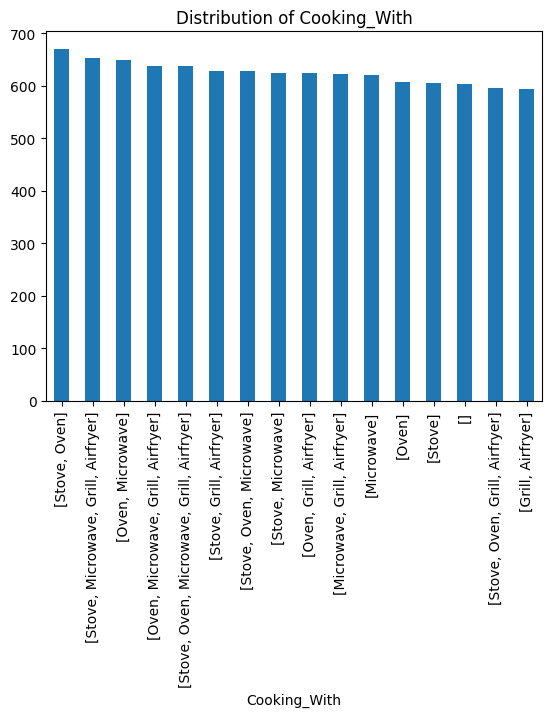

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove 'CarbonEmission' from numerical_cols if it's the target variable and we want to visualize it separately later, or keep it.
# For now, let's keep it and visualize it.

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Plotting numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plotting categorical columns
for col in categorical_cols:
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
df.head(5)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,Unknown,often,230,frequently,210,large,4,7,26,1,No,[Metal],"[Stove, Oven]",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,Unknown,often,114,rarely,9,extra large,3,9,38,5,No,[Metal],"[Stove, Microwave]",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,[Metal],"[Oven, Microwave]",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,Unknown,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"[Paper, Plastic, Glass, Metal]","[Microwave, Grill, Airfryer]",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,[Paper],[Oven],4743


In [ ]:
df['Heating Energy Source'].value_counts()

,count
Heating Energy Source,
electricity,2552
coal,2523
wood,2463
natural gas,2462


In [ ]:
df = pd.get_dummies(df, columns=["Frequency of Traveling by Air"])

In [ ]:
df = pd.get_dummies(df, columns=["Waste Bag Size"])

In [ ]:
emission_mapping = {
    "electricity": 1,
    "natural gas": 2,
    "wood": 3,
    "coal": 4
}

df["Heating Energy Source"] = df["Heating Energy Source"].map(emission_mapping)


In [ ]:
df.columns

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count',
       'How Long TV PC Daily Hour', 'How Many New Clothes Monthly',
       'How Long Internet Daily Hour', 'Energy efficiency', 'Recycling',
       'Cooking_With', 'CarbonEmission',
       'Frequency of Traveling by Air_frequently',
       'Frequency of Traveling by Air_never',
       'Frequency of Traveling by Air_rarely',
       'Frequency of Traveling by Air_very frequently',
       'Waste Bag Size_extra large', 'Waste Bag Size_large',
       'Waste Bag Size_medium', 'Waste Bag Size_small'],
      dtype='object')

In [ ]:
df.head()
df.to_csv("carbon_emission_processed")